# K-means Clustering with Python

K-means is unsupervised machine learning technique; attempts to classify data without having been first trainged with labeled data.

Real world applications:
    - Customer profiling
    - Market segmentation
    - Computer vision
    - Search engines
    - Astronomy
 

Algorithm:

    1. Select K random points as cluster centers called centroids
    2. Assign each point to the clostest cluster with respect to the 
       centroids
    3. Determine new cluster center by computing average of assigned 
       points
    4. Iterate through steps 2 and 3 until cluster assignments don't 
       change

## Optimizing Cluster Number 
Graph number of clusters and Within Cluster Sum of Squares (WCSS) then we select the number of clusters where change in WCSS begins to level off (elbow method).

Essentially want to determine the number of clusters where adding any more will not make any more impact on WCSS. 

# Example using Random Data

In [3]:
# import relevant libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

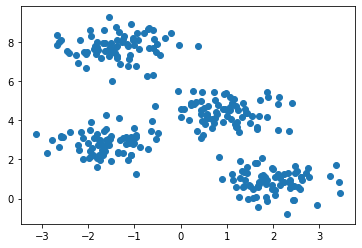

In [5]:
#generate own data using make_blobs; centers specifies num of clusters
x, y = make_blobs(n_samples = 300, centers = 4, cluster_std = 0.60, random_state = 0)
plt.scatter(x[:,0],x[:,1])

## Determine optimal number of clusters
Use elbow method method by training multiple models using different num of clusters and storing the inertia_ property (WCCS) every time

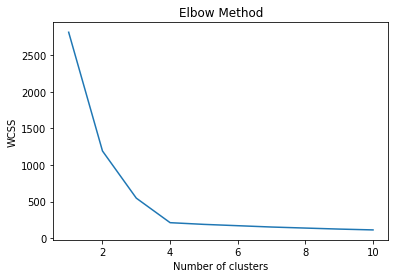

In [8]:
wcss = []

#iterate through mutliple models 
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init="k-means++",max_iter=300, \
                   n_init = 10, random_state=0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

#show results
plt.plot(range(1,11),wcss)
plt.title("Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

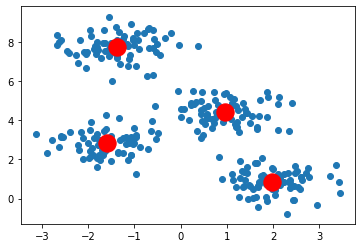

In [10]:
#clearly, optimal number of clusters is 4
#use the k-means++to prevent random initialization trap
kmeans = KMeans(n_clusters=4, init ="k-means++", max_iter = 300, \
               n_init = 10, random_state=0)
pred_y = kmeans.fit_predict(x)

plt.scatter(x[:,0],x[:,1])
plt.scatter(kmeans.cluster_centers_[:,0], \
           kmeans.cluster_centers_[:,1],s=300,c="red")
plt.show()